In [1]:
import pandas as pd
import geopandas as gpd 
import os
import numpy

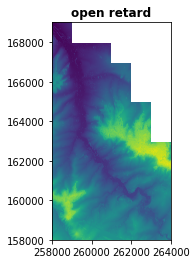

O:\3Dplotting_houses\resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k35.tif


In [2]:
import rasterio 
import rasterio.plot 
import os
from pathlib import Path

file_path = os.path.join(os.path.abspath(''), Path("resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k35.tif"))
tiff = rasterio.open(file_path)
rasterio.plot.show(tiff, title="open retard")
print(file_path)


In [3]:
type(tiff)

rasterio.io.DatasetReader

In [4]:
tiff.shape

(11000, 6000)

In [5]:
tiff

<open DatasetReader name='O:/3Dplotting_houses/resources/DSM_nl_unzip/GeoTIFF/DHMVIIDSMRAS1m_k35.tif' mode='r'>

In [6]:
tiff.count

1

In [7]:
tiff.bounds

BoundingBox(left=258000.0, bottom=158000.0, right=264000.0, top=169000.0)

In [15]:
tiff.bounds.left

258000.0

In [10]:
tiff.width

6000

In [11]:
from osgeo import osr, gdal
ds = gdal.Open(file_path)
old_cs = osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

0

In [12]:
import pprint
pprint.pp(gdal.Info(file_path, deserialize=False))

('Driver: GTiff/GeoTIFF\n'
 'Files: '
 'O:\\3Dplotting_houses\\resources\\DSM_nl_unzip\\GeoTIFF\\DHMVIIDSMRAS1m_k35.tif\n'
 'Size is 6000, 11000\n'
 'Coordinate System is:\n'
 'PROJCRS["BD72 / Belgian Lambert 72",\n'
 '    BASEGEOGCRS["BD72",\n'
 '        DATUM["Reseau National Belge 1972",\n'
 '            ELLIPSOID["International 1924",6378388,297,\n'
 '                LENGTHUNIT["metre",1]]],\n'
 '        PRIMEM["Greenwich",0,\n'
 '            ANGLEUNIT["degree",0.0174532925199433]],\n'
 '        ID["EPSG",4313]],\n'
 '    CONVERSION["Belgian Lambert 72",\n'
 '        METHOD["Lambert Conic Conformal (2SP)",\n'
 '            ID["EPSG",9802]],\n'
 '        PARAMETER["Latitude of false origin",90,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8821]],\n'
 '        PARAMETER["Longitude of false origin",4.36748666666667,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8822]],\n'
 '        PARAMETER["Latitude of 1st 

In [13]:
import pycrs
from pathlib import Path

path_file_prj = os.path.join(os.path.abspath(''), Path('\resources\DSM_nl_unzip\DHMVII_vdc_k01.zip'))

# for file in os.listdir(path_file_prj):
#     os.chdir(path_file_prj)
#     if file.endswith('.prj'):
crs = pycrs.load.from_file('resources\DSM_nl_unzip\DHMVII_vdc_k01.zip')
print(crs)
        

None


In [25]:
crs = pycrs.load.from_file('resources\DSM_nl_unzip\DHMVII_vdc_k33.prj')
crs

In [15]:
crs = pycrs.parse.from_epsg_code(8824)

In [16]:
print(crs)

In [38]:
from pyproj import CRS
test = CRS.from_epsg(31370)
test

<Derived Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [26]:
pprint.pp(gdal.Info("resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k11.tif", deserialize=False))

('Driver: GTiff/GeoTIFF\n'
 'Files: resources\\DSM_nl_unzip\\GeoTIFF\\DHMVIIDSMRAS1m_k11.tif\n'
 'Size is 15500, 8500\n'
 'Coordinate System is:\n'
 'PROJCRS["BD72 / Belgian Lambert 72",\n'
 '    BASEGEOGCRS["BD72",\n'
 '        DATUM["Reseau National Belge 1972",\n'
 '            ELLIPSOID["International 1924",6378388,297,\n'
 '                LENGTHUNIT["metre",1]]],\n'
 '        PRIMEM["Greenwich",0,\n'
 '            ANGLEUNIT["degree",0.0174532925199433]],\n'
 '        ID["EPSG",4313]],\n'
 '    CONVERSION["Belgian Lambert 72",\n'
 '        METHOD["Lambert Conic Conformal (2SP)",\n'
 '            ID["EPSG",9802]],\n'
 '        PARAMETER["Latitude of false origin",90,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8821]],\n'
 '        PARAMETER["Longitude of false origin",4.36748666666667,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8822]],\n'
 '        PARAMETER["Latitude of 1st standard parallel",51.16666

In [53]:
from pyproj import Proj, Transformer
in_proj = Proj('epsg:3857')
out_proj = Proj('epsg:31370')
x1,y1 = 50.836944262097674, 4.412508942584853
x2,y2 = transform(in_proj,out_proj,x1,y1)
print(x2,y2)

-529988.6618250113 -6145689.139256799


C:\Users\alebe\AppData\Local\Temp\ipykernel_15416\3173710117.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2,y2 = transform(in_proj,out_proj,x1,y1)


In [9]:
from pyproj import Proj, Transformer
x = Transformer.from_crs("epsg:4326", "epsg:31370")
y = x.transform(50.83328332575651, 4.486834876965997)

In [10]:
y[0], y[1]


(158318.45218743282, 169213.77478076983)

In [11]:
pa = x.transform(50.82257231642299, 4.486812551815184)
pa

(158318.78500903776, 168022.2792733321)

In [12]:
type(y[0])

float

(72664.43172377795, 226596.70960106794)
Our coordinates are inside the DHMVIIDSMRAS1m_k05.tif file.


C:\Users\alebe\Envs\3Dhouse\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\alebe\Envs\3Dhouse\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\alebe\Envs\3Dhouse\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


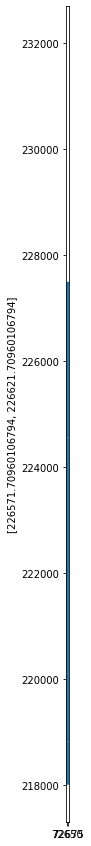

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from plotting import Plotting
import numpy as np

test = Plotting(51.34395808132645, 3.2588635662958314)
coord = test.transform_coord()
print(coord)
test.wich_file()
slice = 25
x_bounds = [coord[0] - slice, coord[0] + slice]
y_bounds = [coord[1] - slice, coord[1] + slice]

t5_shape = gpd.read_file('resources\DSM_nl_unzip\DHMVII_vdc_k5.shp')
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_xlim(x_bounds)
ax.set_ylabel(y_bounds)
t5_shape.plot(ax=ax, legend=True)
plt.show()

In [21]:
t5_shape

,Date,OpnDatum1,OpnDatum2,geometry
0,20140319,2014-03-19,None,"POLYGON Z ((86000.000 230206.366 0.000, 85998...."
1,20140317,2014-03-19,2014-03-17,"POLYGON Z ((86000.000 230206.366 0.000, 86000...."
2,20140317,2014-03-17,None,"MULTIPOLYGON Z (((97000.000 228000.000 0.000, ..."
3,20140317,2014-03-17,2014-03-30,"MULTIPOLYGON Z (((95075.940 227675.980 0.000, ..."
4,20140330,2014-03-30,None,"POLYGON Z ((87000.000 227360.941 0.000, 87000...."
5,20140330,2014-03-30,2014-03-31,"MULTIPOLYGON Z (((67106.560 224569.260 0.000, ..."
6,20140331,2014-03-31,None,"POLYGON Z ((98000.000 224213.494 0.000, 98000...."
7,20140331,2014-03-31,2014-04-01,"MULTIPOLYGON Z (((66364.220 220127.500 0.000, ..."
8,20140401,2014-04-01,None,"POLYGON Z ((69144.125 219908.699 0.000, 69148...."
9,20140401,2014-04-01,2014-04-02,"POLYGON Z ((98000.000 219184.145 0.000, 98000...."


In [22]:
t5_shape.geometry.name

'geometry'

In [28]:
my_gpd = t5_shape.cx[(coord[0] - slice):(coord[0] + slice), (coord[1] - slice):(coord[1] + slice)]

C:\Users\alebe\Envs\3Dhouse\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:>

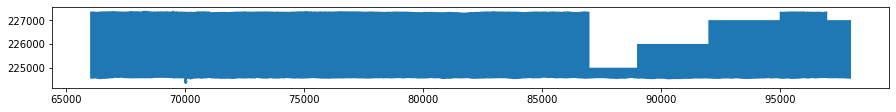

In [34]:
my_gpd.plot(figsize=(15,15))

In [42]:
my_gpd

,Date,OpnDatum1,OpnDatum2,geometry
4,20140330,2014-03-30,None,"POLYGON Z ((87000.000 227360.941 0.000, 87000...."


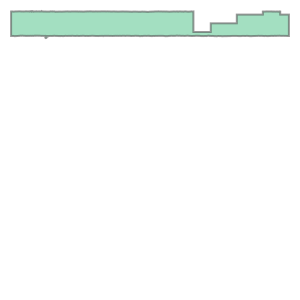

In [46]:
t5_shape.loc[4,"geometry"]

C:\Users\alebe\Envs\3Dhouse\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


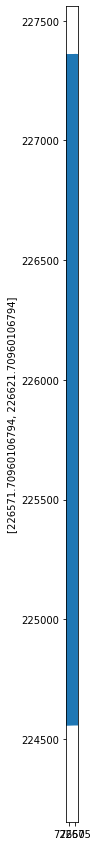

In [47]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_xlim(x_bounds)
ax.set_ylabel(y_bounds)
my_gpd.plot(ax=ax, legend=True)
plt.show()